<a href="https://colab.research.google.com/github/safdarjung/saf/blob/main/Pytorch_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [2]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your data and target variables respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train

,class
47339,5
67456,4
12308,8
32557,0
664,2
...,...
37194,6
6265,6
54886,1
860,0


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
class CustomDataset(Dataset):
  def __init__(self, X,y, transform=None, is_test=False):
    self.dataframe = pd.DataFrame(X)
    self.y_vals = pd.DataFrame(y)
    self.transform = transform
    self.is_test = is_test

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, idx):
    item = self.dataframe.iloc[idx]
    y_vals = self.y_vals.iloc[idx]
    if self.is_test:
      image = item.values.reshape(28, 28).astype(np.uint8)
      label = None
    else:
      image = item.values.reshape(28, 28).astype(np.uint8)
      label = y_vals.iloc[0]
    image = transforms.ToPILImage()(image)
    if self.transform:
      image = self.transform(image)

    if self.is_test:
      return image
    else:
      return image, label





In [8]:
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [9]:
train_dataset = CustomDataset(X_train,y_train, transform=transform, is_test=False)
test_dataset = CustomDataset(X_test, y_test,transform=transform, is_test=True)

In [10]:
print(len(train_dataset))
print(len(test_dataset))

56000
14000


In [11]:
train_dataset[1]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [12]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

torch.Size([64, 1, 28, 28])


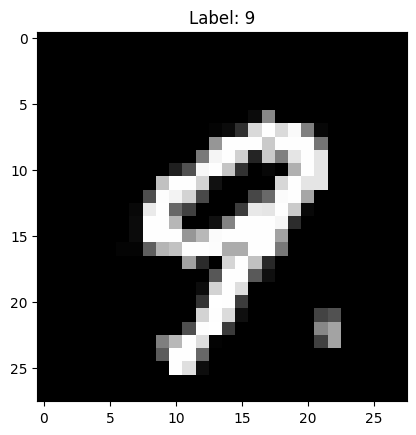

In [13]:
for ex, label in train_loader:
  img = ex[0]
  print(ex.size())
  img_np = img.permute(1,2,0).numpy()
  plt.imshow(img_np, cmap='gray')
  plt.title(f"Label: {label[0]}")
  plt.show()
  break

In [14]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN,self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

# ((Width-Kernel + 2*padding)/Stride) + 1

    self.fc1 = nn.Linear(128*7*7,128)
    self.dropout = nn.Dropout(0.5)
    self.fc2 = nn.Linear(128,20)
    self.fc3 = nn.Linear(20,10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.conv3(x)
    x = self.pool(x)

    x_size = x.size(1) * x.size(2) * x.size(3)

    x = x.view(-1, x_size)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    return x


In [15]:
model = SimpleCNN()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [16]:
num_epochs = 150
running_loss = 0.0

for epoch in range(num_epochs):
    for i, data in enumerate(train_loader, 0):
        # Unpack the data correctly
        inputs, labels = data[0], data[1]  # First element is inputs, second is labels

        # Convert labels to integers if they are strings
        labels = torch.tensor([int(label) for label in labels]).to(device)

        # Move tensors to device
        inputs = inputs.to(device)

        optimizer.zero_grad()
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:
            print(f"Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}")
            running_loss = 0.0

print("Finished Training")

Epoch 1, Batch 100, Loss: 2.300596079826355
Epoch 1, Batch 200, Loss: 2.292385959625244
Epoch 1, Batch 300, Loss: 2.28048321723938
Epoch 1, Batch 400, Loss: 2.2590389823913575
Epoch 1, Batch 500, Loss: 2.208803696632385
Epoch 1, Batch 600, Loss: 2.0784059512615203
Epoch 1, Batch 700, Loss: 1.6907225859165191
Epoch 1, Batch 800, Loss: 1.077574976682663
Epoch 2, Batch 100, Loss: 1.2702546003460884
Epoch 2, Batch 200, Loss: 0.5785110965371132
Epoch 2, Batch 300, Loss: 0.5279380878806115
Epoch 2, Batch 400, Loss: 0.4556771919131279
Epoch 2, Batch 500, Loss: 0.4034952554106712
Epoch 2, Batch 600, Loss: 0.4121650032699108
Epoch 2, Batch 700, Loss: 0.3536486104130745
Epoch 2, Batch 800, Loss: 0.35886589869856833
Epoch 3, Batch 100, Loss: 0.5541830371320248
Epoch 3, Batch 200, Loss: 0.2974220025539398
Epoch 3, Batch 300, Loss: 0.29506283454597
Epoch 3, Batch 400, Loss: 0.272386604771018
Epoch 3, Batch 500, Loss: 0.26837688460946085
Epoch 3, Batch 600, Loss: 0.2601052873581648
Epoch 3, Batch 70

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-bf4e475b150c>", line 21, in <cell line: 4>
    running_loss += loss.item()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.p

TypeError: object of type 'NoneType' has no len()